In [3]:
# import the necessary packages
import pandas as pd
import numpy as np
import argparse
import cv2
import time

flag = 1
x = 320
y = 240
size = 10
roi = []
frame_rate = 5
prev = 0
df = pd.DataFrame(columns=['Timestamp', 'R/G value'])

t = time.localtime()
tstamp = time.strftime('%b-%d-%Y_%H%M', t)

cap = cv2.VideoCapture(0) # Set Capture Device, in case of a USB Webcam try 1, or give -1 to get a list of available devices

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(tstamp + '.avi',fourcc, frame_rate, (640,480))

#Set Width and Height 
# cap.set(3,1280)
# cap.set(4,720)

# The above step is to set the Resolution of the Video. The default is 640x480.
# This example works with a Resolution of 640x480.
while(True):
    ret, frame = cap.read()
    
    font = cv2.FONT_HERSHEY_SIMPLEX    
    cv2.putText(frame,"Press s to start..." ,(10,50), font, 0.6,(255,255,255),2,cv2.LINE_AA)

    if cv2.waitKey(1) & 0xFF == ord('s'):
        break   
    elif cv2.waitKey(1) & 0xFF == ord('2'):
        y = y + 10
    elif cv2.waitKey(1) & 0xFF == ord('8'):
        y = y - 10
    elif cv2.waitKey(1) & 0xFF == ord('6'):
        x = x + 10
    elif cv2.waitKey(1) & 0xFF == ord('4'):
        x = x - 10
    elif cv2.waitKey(1) & 0xFF == ord('+'):
        size = size + 5
    elif cv2.waitKey(1) & 0xFF == ord('-'):
        size = size - 5
        
    cv2.rectangle(frame, (x - size, y - size), (x + size, y + size), (255,255,255), 4) #Pintamos los circulos en la mascara    
    cv2.imshow('frame',frame)
    
start_time = time.time()

while(flag):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    time_elapsed = time.time() - prev
    
    if time_elapsed > 1./frame_rate:
        prev = time.time()
        # Image processing part
        # load the image, clone it for output, and then convert it to grayscale
        output = frame.copy()

        cv2.rectangle(output, (x - size, y - size), (x + size, y + size), (255,255,255), 1) #Pintamos los circulos en la mascara

        
        rect_img = np.zeros((output.shape[0],output.shape[1]), np.uint8) #Creamos mascara (matriz de ceros) del tamano de la imagen original
        cv2.rectangle(rect_img, (x - size, y - size), (x + size, y + size), (255,255,255), -1) #Pintamos los circulos en la mascara
        mean_rgb = cv2.mean(output, mask=rect_img)[::-1]
        mean_g = round(mean_rgb[1],2)
        mean_r = round(mean_rgb[2],2)
        mean_rg = round(mean_rgb[2]/mean_rgb[1],4)

        timestamp = time.time() - start_time
        df = df.append(pd.Series([timestamp, mean_rg], index=df.columns), ignore_index=True)

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(output,"Average G value: " + str(mean_g) ,(10,50), font, 0.6,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(output,"Average R value: " + str(mean_r) ,(10,70), font, 0.6,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(output,"Average R/G: " + str(mean_rg) ,(10,90), font, 0.6,(255,255,255),2,cv2.LINE_AA)

        cv2.putText(output,"Measurement duration: " + str(round(timestamp,2)) + ' s',(10,440), font, 0.6,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(output,"Press Esc to stop measurement" ,(10,460), font, 0.6,(255,255,255),2,cv2.LINE_AA)

        # Display the resulting frame
        ## cv2.imshow('gray',gray)

        r = output.copy()
        # set blue and green channels to 0
        r[:, :, 0] = 0
        r[:, :, 1] = 0

        g = output.copy()
        # set blue and red channels to 0
        g[:, :, 0] = 0
        g[:, :, 2] = 0

        cv2.imshow('red', r)
        cv2.imshow('green', g)
        cv2.imshow('frame',output)
        out.write(frame)

        # Press Esc to break
        if cv2.waitKey(1) & 0xFF == 27:
            break
            
# When everything is done, release the capture
out.release()
cap.release()
cv2.destroyAllWindows()

df.to_excel(tstamp + '.xlsx')

Text(0, 0.5, 'R/G value')

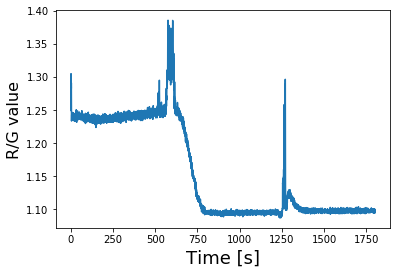

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['Timestamp'], df['R/G value'])
plt.xlabel('Time [s]', fontsize=18)
plt.ylabel('R/G value', fontsize=16)